In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

#api_keys='b827b019baed2ef185e24952324c8948'

# Import API key
from api_keys import weather_api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/mikan/Documents/Data Science Bootcamp/Python_API_Homework/WeatherPy/"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

614

In [7]:
# Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

from pprint import pprint

 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_keys}&units={units}&q="
query_url

# How the raw data look like? 
city1='london'
resp1=requests.get(query_url + city1).json()
pprint(resp1)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1584056555,
 'id': 2643743,
 'main': {'feels_like': -1.46,
          'humidity': 70,
          'pressure': 1012,
          'temp': 6.11,
          'temp_max': 7.22,
          'temp_min': 5},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'sunrise': 1583994043,
         'sunset': 1584035988,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 8.2}}


In [6]:
# set up lists to hold reponse info
City_id=[]
City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_temp=[]
Wind_Speed=[]

# Loop through the list of cities and perform a request for data on each
# Include a print log of each city as it's being processed (with the city number and city name).
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        City_id.append(response['id'])
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print ('City_ID: ' + str(response["id"]), 'City_name: ' + response["name"])
    except KeyError:
        print("The key has an issue.")


City_ID: 6089245 City_name: Norman Wells


ConnectionError: HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?appid=b827b019baed2ef185e24952324c8948&units=metric&q=maniitsoq (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001EB2C6AA3C8>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [67]:
#Convert Raw Data to DataFrame
#Display the DataFrame

#reference :https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
city_df = pd.DataFrame(list(zip(City_id, City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max_temp, Wind_Speed)), 
               columns =['City_id', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max_temp', 'Wind_Speed']) 
city_df.head()


City_id        City  Cloudiness Country        Date  Humidity    Lat  \
0  1015776  Bredasdorp          92      ZA  1583979995        88 -34.53   
1   347634       Ţahţā          75      EG  1583980094        31  26.77   
2  2236967        Soyo          76      AO  1583980004        87  -6.13   
3  3421765  Nanortalik           0      GL  1583979997        72  60.14   
4  3883457        Lebu          67      CL  1583980239        95 -37.62   

     Lng  Max_temp  Wind_Speed  
0  20.04     19.00        6.20  
1  31.50     26.00        9.30  
2  12.37     26.13        0.73  
3 -45.24     -3.52        2.32  
4 -73.65     11.01        0.91

In [68]:
city_df.count()

City_id       541
City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max_temp      541
Wind_Speed    541
dtype: int64

In [69]:
#Export the city data into a .csv.
# reference :https://datatofish.com/export-dataframe-to-csv/
city_df.to_csv (r'C:\Users\mikan\Documents\Data Science Bootcamp\Python_API_Homework\WeatherPy\export_city_df.csv', index = False, header=True)

In [2]:
# OpenWeather seems to have an issue 
# city_df is saved in CSV file.
# Let's pull it into here, so I can keep working on the rest of the homework;

city_df = pd.read_csv("/Users/mikan/Documents/Data Science Bootcamp/Python_API_Homework/WeatherPy/export_city_df.csv") 
city_df.head()

City_id        City  Cloudiness Country        Date  Humidity    Lat  \
0  1015776  Bredasdorp          92      ZA  1583979995        88 -34.53   
1   347634       Ţahţā          75      EG  1583980094        31  26.77   
2  2236967        Soyo          76      AO  1583980004        87  -6.13   
3  3421765  Nanortalik           0      GL  1583979997        72  60.14   
4  3883457        Lebu          67      CL  1583980239        95 -37.62   

     Lng  Max_temp  Wind_Speed  
0  20.04     19.00        6.20  
1  31.50     26.00        9.30  
2  12.37     26.13        0.73  
3 -45.24     -3.52        2.32  
4 -73.65     11.01        0.91

In [23]:
# Create a variable for temeratures in Fahrenheit 
# OpenWeather Metric default temperature is metric. Convert to Fahrenheit
# reference https://www.pythonforbeginners.com/code-snippets-source-code/python-code-celsius-and-fahrenheit-converter
Max_temp_F=(city_df['Max_temp']* 9/5) + 32

# OpenWeather Metric default wind speed is meter/sec based on their documentation
# Convert it to mph : meters per second × 2.236936
# reference :https://www.inchcalculator.com/convert/meter-per-second-to-mile-per-hour/
Wind_Speed_MPH=(city_df['Wind_Speed']*2.236936)

# Add this field to city_df
city_df['Max_temp_F'] = Max_temp_F 
city_df['Wind_Speed_MPH'] = Wind_Speed_MPH

# Drop any rows will null values. 
city_df.dropna()

city_df.head()

City_id        City  Cloudiness Country        Date  Humidity    Lat  \
0  1015776  Bredasdorp          92      ZA  1583979995        88 -34.53   
1   347634       Ţahţā          75      EG  1583980094        31  26.77   
2  2236967        Soyo          76      AO  1583980004        87  -6.13   
3  3421765  Nanortalik           0      GL  1583979997        72  60.14   
4  3883457        Lebu          67      CL  1583980239        95 -37.62   

     Lng  Max_temp  Wind_Speed  Max_temp_F  Wind_Speed_MPH  
0  20.04     19.00        6.20      66.200       13.869003  
1  31.50     26.00        9.30      78.800       20.803505  
2  12.37     26.13        0.73      79.034        1.632963  
3 -45.24     -3.52        2.32      25.664        5.189692  
4 -73.65     11.01        0.91      51.818        2.035612

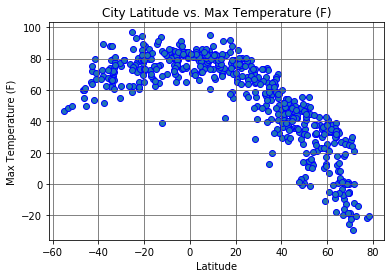

In [27]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot
# reference : https://riptutorial.com/matplotlib/example/14063/plot-with-gridlines

latitude = city_df.Lat
maxtemp = city_df.Max_temp_F
fig = plt.figure()
plt.scatter(latitude,maxtemp, edgecolors='b')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (F)")
plt.show()

fig.savefig('Lat_Tempe.png')

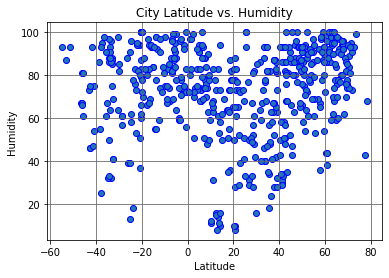

In [24]:
# Latitude vs. Humidity Plot

latitude = city_df.Lat
maxhum = city_df.Humidity
fig = plt.figure()
plt.scatter(latitude,maxhum, edgecolors='b')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.show()

fig.savefig('Lat_Humid.png')


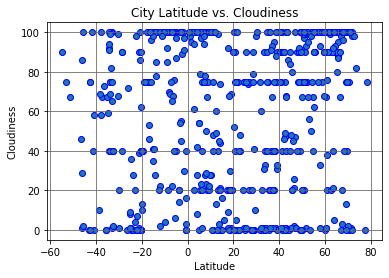

In [25]:
# Latitude vs. Cloudiness Plot

latitude = city_df.Lat
maxcld = city_df.Cloudiness
fig = plt.figure()
plt.scatter(latitude,maxcld, edgecolors='b')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.show()

fig.savefig('Lat_Cloud.png')

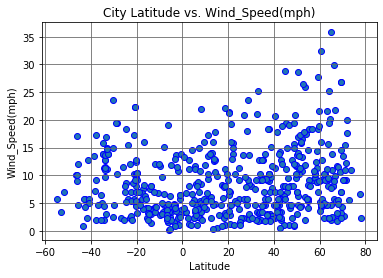

In [28]:
# Latitude vs. Wind Speed Plo

latitude = city_df.Lat
maxwin = city_df.Wind_Speed_MPH
fig = plt.figure()
plt.scatter(latitude,maxwin, edgecolors='b')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed(mph)")
plt.title("City Latitude vs. Wind_Speed(mph)")
plt.show()

fig.savefig('Lat_Wind.png')

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [49]:
# Create Northern and Southern Hemisphere DataFrames

# Select rows in Northern Hemisphere
north_df=city_df.loc[city_df['Lat'] >= 0]
north_df.head()

# Select rows in Southern Hemisphere
south_df=city_df.loc[city_df['Lat'] < 0]
south_df.head()

City_id           City  Cloudiness Country        Date  Humidity    Lat  \
0  1015776     Bredasdorp          92      ZA  1583979995        88 -34.53   
2  2236967           Soyo          76      AO  1583980004        87  -6.13   
4  3883457           Lebu          67      CL  1583980239        95 -37.62   
6  3457360  Medeiros Neto         100      BR  1583980239        97 -17.37   
7  4020109         Atuona           4      PF  1583980239        75  -9.80   

      Lng  Max_temp  Wind_Speed  Max_temp_F  Wind_Speed_MPH  
0   20.04     19.00        6.20      66.200       13.869003  
2   12.37     26.13        0.73      79.034        1.632963  
4  -73.65     11.01        0.91      51.818        2.035612  
6  -40.22     22.52        3.35      72.536        7.493736  
7 -139.03     27.93        5.20      82.274       11.632067

In [17]:
# Northern Hemisphere - Temperature (F) vs. Latitude
x_values = north_df['Lat']
y_values = north_df['Max_temp_F']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.22x +93.7


In [82]:
# Put the steps above into a function

def reg_line(x_values,y_values, z, t):
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
    
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(z)
    plt.title(t)

    # Print r square value
    print(f"The r-squared is: {rvalue}")

    # Show plot
    plt.show()

y = -1.22x +93.7
The r-squared is: -0.8802447293533099


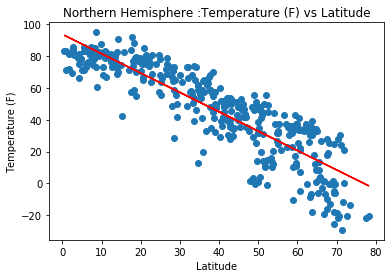

In [83]:
# Northern Hemisphere - Temperature (F) vs. Latitude
reg_line(north_df['Lat'], north_df['Max_temp_F'], 'Temperature (F)','Northern Hemisphere :Temperature (F) vs Latitude')

y = 0.39x +82.75
The r-squared is: 0.5134035722862685


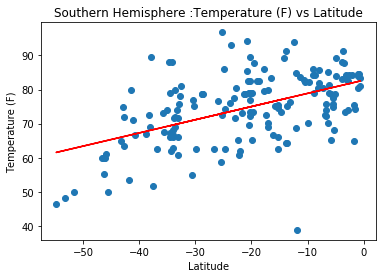

In [84]:
# Southern Hemisphere - Temperature (F) vs. Latitude
reg_line(south_df['Lat'], south_df['Max_temp_F'], 'Temperature (F)','Southern Hemisphere :Temperature (F) vs Latitude')

y = 0.32x +58.7
The r-squared is: 0.30428528990532644


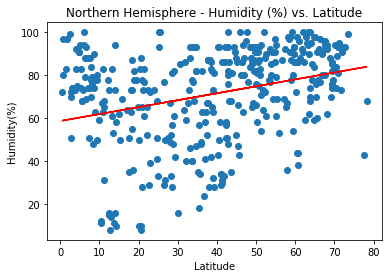

In [85]:
# Northern Hemisphere - Humidity (%) vs. Latitude
reg_line(north_df['Lat'], north_df['Humidity'],'Humidity(%)','Northern Hemisphere - Humidity (%) vs. Latitude')

y = 0.26x +82.45
The r-squared is: 0.19456746514918533


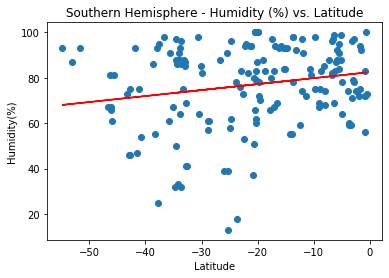

In [86]:
# Southern Hemisphere - Humidity (%) vs. Latitude
reg_line(south_df['Lat'], south_df['Humidity'],'Humidity(%)','Southern Hemisphere - Humidity (%) vs. Latitude')

y = 0.41x +40.9
The r-squared is: 0.22310463932750962


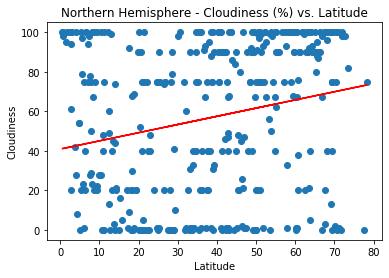

In [87]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
reg_line(north_df['Lat'], north_df['Cloudiness'],'Cloudiness','Northern Hemisphere - Cloudiness (%) vs. Latitude')

y = 0.26x +60.72
The r-squared is: 0.09243372960947698


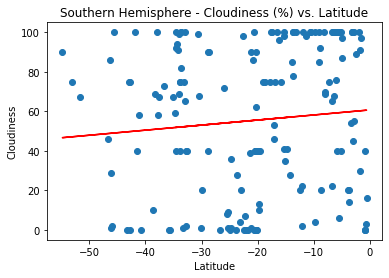

In [88]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
reg_line(south_df['Lat'], south_df['Cloudiness'],'Cloudiness','Southern Hemisphere - Cloudiness (%) vs. Latitude')

y = 0.06x +6.67
The r-squared is: 0.20295577063833345


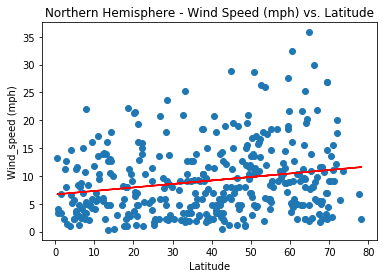

In [89]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
reg_line(north_df['Lat'], north_df['Wind_Speed_MPH'],'Wind_speed (mph)','Northern Hemisphere - Wind Speed (mph) vs. Latitude')

y = -0.1x +5.55
The r-squared is: -0.2718658122022453


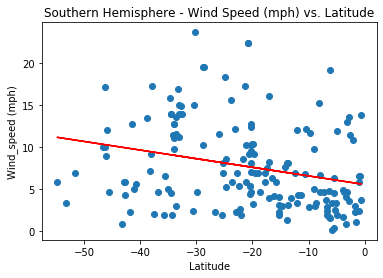

In [90]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
reg_line(south_df['Lat'], south_df['Wind_Speed_MPH'],'Wind_speed (mph)', 'Southern Hemisphere - Wind Speed (mph) vs. Latitude')